<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Clustering and geospatial analysis
© ExploreAI Academy

In this train, we'll use geopandas to plot geospatial data and create multidimensional plots by adjusting size and colour.

## Learning objectives

By the end of this train, you should be able to;
- Create multidimensional plots by adjusting size and colour;
- Use geopandas to plot geospatial data.

## Introduction

In this train, we will introduce multidimensional plotting and work with geospatial data. Let's start by importing the packages we'll need for this train.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

Before you continue, install this library using `conda install geopandas`. If you are struggling to install the `geopandas` package correctly, run this notebook on Google Colab and install the package using the following cell:

In [2]:
#!pip install geopandas

## Preparing the Data
In this train, we will be using the same preprocessing and clustering technique as in the Hierarchical Clustering train, but just adjusted for use with United States census data. Let's load the data and take a look at it.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/acs2015_county_data.csv', encoding='utf-8').dropna()
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


We'll set the labels to `CensusID`, `State`, and `County` and scale the features using `StandardScaler`. 

In [4]:
labels = ['CensusId', 'State', 'County']
features = [col for col in df.columns if col not in labels]

scaler = StandardScaler()
df[features] = df[features].astype('float64')
X = scaler.fit_transform(df[features])

We'll now cluster our data using `AgglomerativeClustering` with 4 clusters. In this train, we will use [Ward's minimum variance method](https://en.wikipedia.org/wiki/Ward%27s_method) for our linkage method with the Euclidean distance metric. You are encouraged to try out different distance metrics and linkage methods and see how your results differ.   

In [5]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean').fit(X)
df['cluster'] = hc.labels_ + 1
df['cluster'] = df['cluster'].astype('int64')

## Multidimensional plotting
Before we plot the geospatial data let's first look at another way to fit more features into a single plot. In the Hierarchical Clustering train, we only plotted data using the horizontal and vertical axes, but we have yet to look at the different visual channels.  

Let's use both shape and colour to add two new dimensions to our plot. First, we will decide on a suitable palette with four colours:

In [6]:
sns.palplot(sns.color_palette("Set1", n_colors=4))
sns.palplot(sns.color_palette("Set2", n_colors=4))
sns.palplot(sns.color_palette("Set3", n_colors=4))
sns.palplot(sns.color_palette("Paired", n_colors=4))

#### Custom colour palettes
Seaborn also provides support for using names from this [xkcd crowdsourced effort](https://blog.xkcd.com/2010/05/03/color-survey-results/) to name random RGB colours. You can find the list of colours [here](https://xkcd.com/color/rgb/).

In [7]:
# choose four colours
colours = ["windows blue", "amber", "coral", "faded green"]
# plot them as a palette
sns.palplot(sns.xkcd_palette(colours))

Let's now use this colour palette to help us visualise our clusters while plotting `IncomePerCap` vs `MeanCommute`. We'll also adjust the size of the points according to the rate of `Unemployment`.

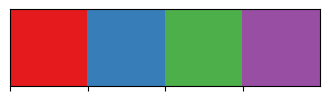

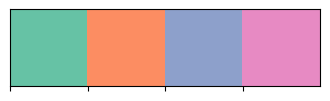

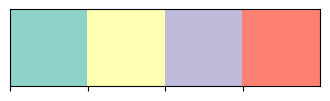

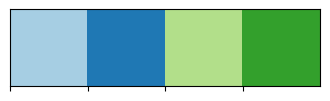

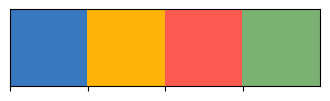

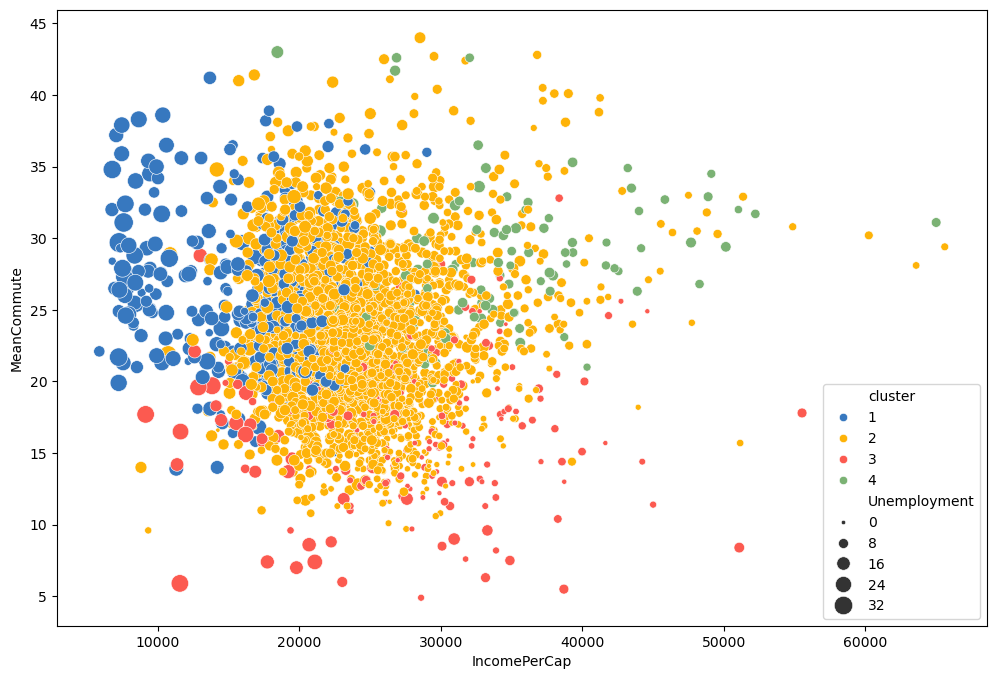

In [8]:
# create our colour palette
cmap = sns.xkcd_palette(colours)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="IncomePerCap", y="MeanCommute",
                     hue="cluster", size="Unemployment",
                     palette=cmap, sizes=(10, 200),
                     data=df)
plt.show()

This is just a nudge in the right direction. You are encouraged to do some more interrogations of the clusters to gain further insights.

> Make use of the [seaborn example gallery](https://seaborn.pydata.org/examples/index.html) for some inspiration

## Quick introduction to geospatial data analysis
We will now work through an introduction to a really cool Python library for working with geospatial data, called [GeoPandas](http://geopandas.org/). A lot more can be done with this package than what we do here. We encourage you to explore this package more.

To load a GeoDataFrame, you do it in a very similar way to loading a regular Pandas DataFrame. We have provided a [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) called `us-counties.json`, which can be read straight into GeoPandas a GeoDataFrame:

In [9]:
gdf = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json')

ERROR 1: PROJ: proj_create_from_database: Open of /home/ahmed/miniconda3/envs/denv/share/proj failed


AttributeError: module 'fiona' has no attribute 'path'

GeoDataFrames inherit all the same methods as regular DataFrames. The only difference is that a GeoDataFrame must have a column named `geometry`, which contains the spatial features relating to each observation in the data.   

There are three basic classes of geometric objects:   
- Points (x,y coordinate pairs);
- Lines (multiple points which define segments); and
- Polygons (multiple connected lines which form an enclosed shape).

In [ ]:
gdf.head()

NameError: name 'gdf' is not defined

Our GeoDataFrame consists of all the US counties and their respective polygons. Let's merge this GeoDataFrame with our original DataFrame:

In [ ]:
gdf['id'] = gdf['id'].astype('int64')
df = pd.merge(left=df, right=gdf, how='inner', left_on='CensusId', right_on='id')
del df['id']
del df['name']
# convert to a GeoDataFrame, specifying which column we wish to use for the geometry info
df = gpd.GeoDataFrame(df, geometry='geometry')
df.head(3)

Now, we can plot the counties as a map and adjust the visuals according to the rate of `Unemployment`:

In [ ]:
df.plot(column='Unemployment',
        cmap='Reds',
        figsize=(18,16))
plt.show()

Let's plot the clusters on the map and see where in the United States these clusters are:

In [ ]:
df.plot(column='cluster',
        cmap='tab20c',
        figsize=(18,16),
        categorical=True,
        legend=True)
plt.show()

## Conclusion

In this train, we clustered United States census data, plotted this data multidimensionally, and used `geopandas` to plot geospatial data on a map. This train was a brief introduction to these topics. The reader is encouraged to explore them further.

## Additional Links
[The Art of Effective Visualisation of Multidimensional Data](https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57)

[Some `geopandas` examples](https://geopandas.readthedocs.io/en/latest/gallery/)

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>